# Dependencies and libraries used

In [ ]:
!pip install numpy==1.19.5 # for mathemathical operations and processing the data before feeding them to the network
!pip install scikit-learn==1.0.1 # to call machine learning functions and algorithms
!pip install matplotlib==3.2.2 # to plot the datasets
!pip install keras==2.7.0 # to define and compile models
!pip install tensorflow==2.7.0 # To use tensors

In [99]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [100]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Perpectron Algorithme

In [101]:
def perceptron(s,y):
    w = np.zeros((1,2))
    placeholder = np.zeros((1,2))
    for t in range(2000):
        for X,Y in zip(s,y) :
            if  Y * np.inner(X,w) <= 0 : 
                placeholder = w
                w = w + Y * X 
        if (w == placeholder).all() :
            return w
    if t == 999 :
        print("No convergence")
    return w

## Generating Toy Dataset

In [102]:
mu = [-1,0]
sigma = [[0.25,0], [0,0.25]]
s1 = np.random.multivariate_normal(mu,sigma,125)

mu = [1,0]
sigma = [[0.25,0], [0,0.25]]
s2 = np.random.multivariate_normal(mu,sigma,125)
s = np.concatenate((s1,s2),axis=0)

In [103]:
y = [-1] * 125 
y.extend([1] * 125)

In [104]:
 len(y),len(s)

(250, 250)

In [105]:
s,y= shuffle(s,y)

In [106]:
s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42) 

In [107]:
w = perceptron(s_train,y_train) 

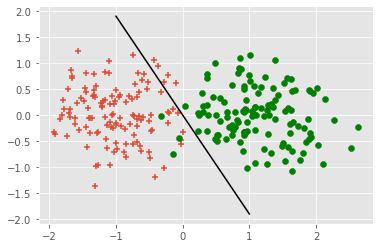

In [108]:
from matplotlib import pyplot as plt

plt.scatter(s1[:,0],s1[:,1], marker='+')
plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')

In [109]:
y_pred = np.inner(s_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.98

## Using Keras to create a fully connected neural network

In [110]:
#Transforming the labels to categories
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [111]:
model=Sequential()
model.add(Dense(2,input_dim=2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_352 (Dense)           (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(np.array(s_train),y_train_cat,epochs=20,batch_size=4)

Epoch 1/20
50/50 [==============================] - 0s 1ms/step - loss: 0.8655 - accuracy: 0.5050
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.8309 - accuracy: 0.5100
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 0.7985 - accuracy: 0.5250
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.7656 - accuracy: 0.5250
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.7344 - accuracy: 0.5250
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5350
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 8/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.5800
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.5850
Epoch 10/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.5950
Epoch 11/20
50/50 [

In [113]:
_, accuracy = model.evaluate(np.array(s_test),y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.9000
Accuracy: 90.00


## Working With Keras Dataset

In [114]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

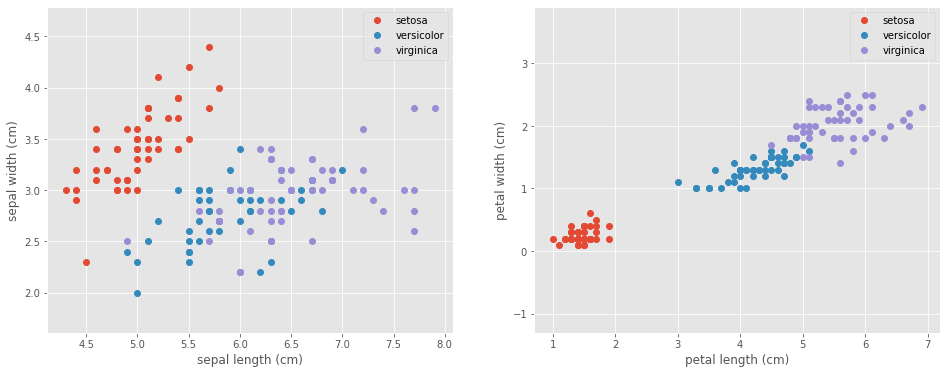

In [115]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

### Generating multiple models with different depths and number of parameters 

In [116]:
def create_custom_model(input_dim, output_dim, nodes, n, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy',
                              tf.keras.metrics.Precision(), 
                               tf.keras.metrics.Recall(), 
                               tf.keras.metrics.AUC()])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_353 (Dense)           (None, 8)                 40        
                                                                 
 dense_354 (Dense)           (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_355 (Dense)           (None, 8)                 40        
                                                                 
 dense_356 (Dense)           (None, 8)                 72        
                                                                 
 dense_357 (Dense)           (None, 3)        

In [117]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.2767530679702759
Test accuracy: 0.9066666960716248
Test precision: 0.9066666960716248
Test recall: 0.9066666960716248
Test f1_score: 0.9828444719314575
Model name: model_2
Test loss: 0.4660887122154236
Test accuracy: 0.9333333373069763
Test precision: 0.9333333373069763
Test recall: 0.9333333373069763
Test f1_score: 0.9694222211837769
Model name: model_3
Test loss: 0.2159830778837204
Test accuracy: 0.9333333373069763
Test precision: 0.9333333373069763
Test recall: 0.9333333373069763
Test f1_score: 0.9864888191223145
Model name: model_4
Test loss: 0.19418556988239288
Test accuracy: 0.9333333373069763
Test precision: 0.9333333373069763
Test recall: 0.9333333373069763
Test f1_score: 0.9908443689346313


## Working With the Digit Dataset

In [118]:
digits=load_digits()
X=digits.data
Y=digits.target
names = digits['target_names']
feature_names = digits['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2)

n_features = X.shape[1]

<Figure size 432x288 with 0 Axes>

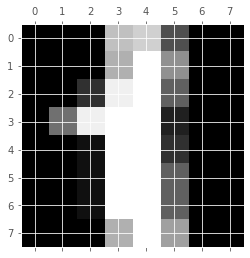

In [119]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [120]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Generating Multiple models with different depths and number of parameters

In [121]:
models = [create_custom_model(n_features, 10, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_381 (Dense)           (None, 10)                650       
                                                                 
 dense_382 (Dense)           (None, 10)                110       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_383 (Dense)           (None, 10)                650       
                                                                 
 dense_384 (Dense)           (None, 10)                110       
                                                                 
 dense_385 (Dense)           (None, 10)     

In [122]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.36748120188713074
Test accuracy: 0.9472222328186035
Test precision: 0.9472222328186035
Test recall: 0.9472222328186035
Test f1_score: 0.9859298467636108
Model name: model_2
Test loss: 0.5319356918334961
Test accuracy: 0.9416666626930237
Test precision: 0.9416666626930237
Test recall: 0.9416666626930237
Test f1_score: 0.9784418940544128
Model name: model_3
Test loss: 0.6951196789741516
Test accuracy: 0.9416666626930237
Test precision: 0.9416666626930237
Test recall: 0.9416666626930237
Test f1_score: 0.9799579381942749
Model name: model_4
Test loss: 1.0490233898162842
Test accuracy: 0.9194444417953491
Test precision: 0.9220055937767029
Test recall: 0.9194444417953491
Test f1_score: 0.9735254049301147


# We Will be Working With the olivetti faces dataset

In [123]:
data = fetch_olivetti_faces()

In [124]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [125]:
faces = data.images
target = data.target

In [126]:
#Total class number equal to 40
all_classes = np.unique(target)
all_classes.sort()
all_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [127]:
 faces = faces.reshape((len(faces), -1))

In [128]:
face_target = to_categorical(target, 40)

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(faces, face_target, test_size=0.2, stratify=target, random_state=0) 

### Generating Multiple models with different depths and number of parameters

In [130]:
# Creating multiple models
# Output dim == 40 , we have 40 classes
models = [create_custom_model(X_train.shape[1], 40, 50, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_409 (Dense)           (None, 50)                204850    
                                                                 
 dense_410 (Dense)           (None, 40)                2040      
                                                                 
Total params: 206,890
Trainable params: 206,890
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_411 (Dense)           (None, 50)                204850    
                                                                 
 dense_412 (Dense)           (None, 50)                2550      
                                                                 
 dense_413 (Dense)           (None, 

In [131]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 3.6888821125030518
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5
Model name: model_2
Test loss: 3.688882827758789
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5
Model name: model_3
Test loss: 3.688882827758789
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5
Model name: model_4
Test loss: 3.6888816356658936
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5
